In [33]:
# using SVM

import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import seaborn as sns

In [2]:
DIR=r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images'

In [3]:
train=pd.read_csv(r"/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/train.csv")
test=pd.read_csv(r"/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/test.csv")


In [4]:
train.head

<bound method NDFrame.head of         image_id  healthy  multiple_diseases  rust  scab
0        Train_0        0                  0     0     1
1        Train_1        0                  1     0     0
2        Train_2        1                  0     0     0
3        Train_3        0                  0     1     0
4        Train_4        1                  0     0     0
...          ...      ...                ...   ...   ...
1816  Train_1816        0                  0     0     1
1817  Train_1817        1                  0     0     0
1818  Train_1818        1                  0     0     0
1819  Train_1819        0                  0     1     0
1820  Train_1820        0                  0     0     1

[1821 rows x 5 columns]>

In [5]:
test.head

<bound method NDFrame.head of        image_id
0        Test_0
1        Test_1
2        Test_2
3        Test_3
4        Test_4
...         ...
1816  Test_1816
1817  Test_1817
1818  Test_1818
1819  Test_1819
1820  Test_1820

[1821 rows x 1 columns]>

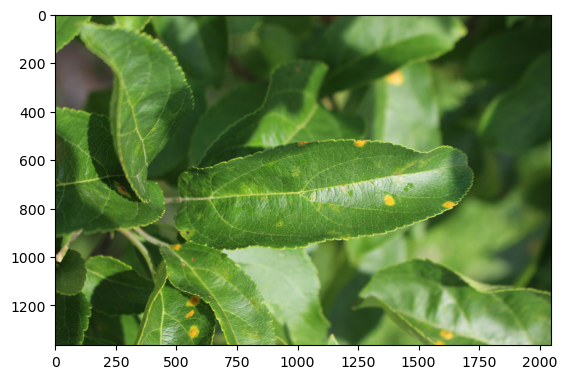

In [6]:
image1=Image.open(r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/Test_0.jpg')
plt.imshow(image1)
plt.show()

In [7]:


# preparing the training data


Text(0.5, 1.0, 'Frequency count')

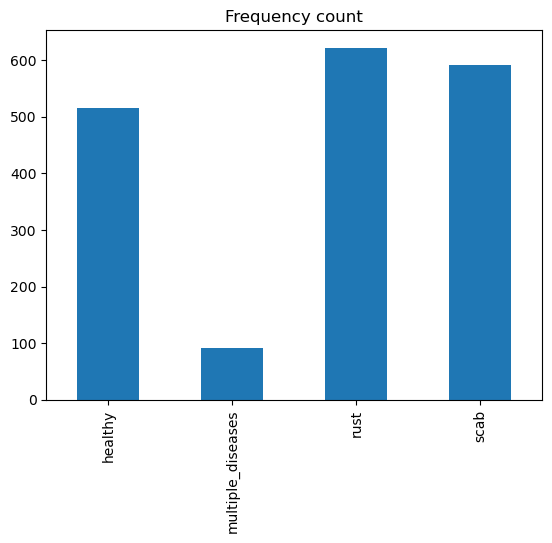

In [8]:
data = train[['healthy', 'multiple_diseases', 'rust', 'scab']].sum(axis=0)
data.plot(kind='bar')
plt.title('Frequency count')

<AxesSubplot: title={'center': 'Data with pie chart'}, ylabel='None'>

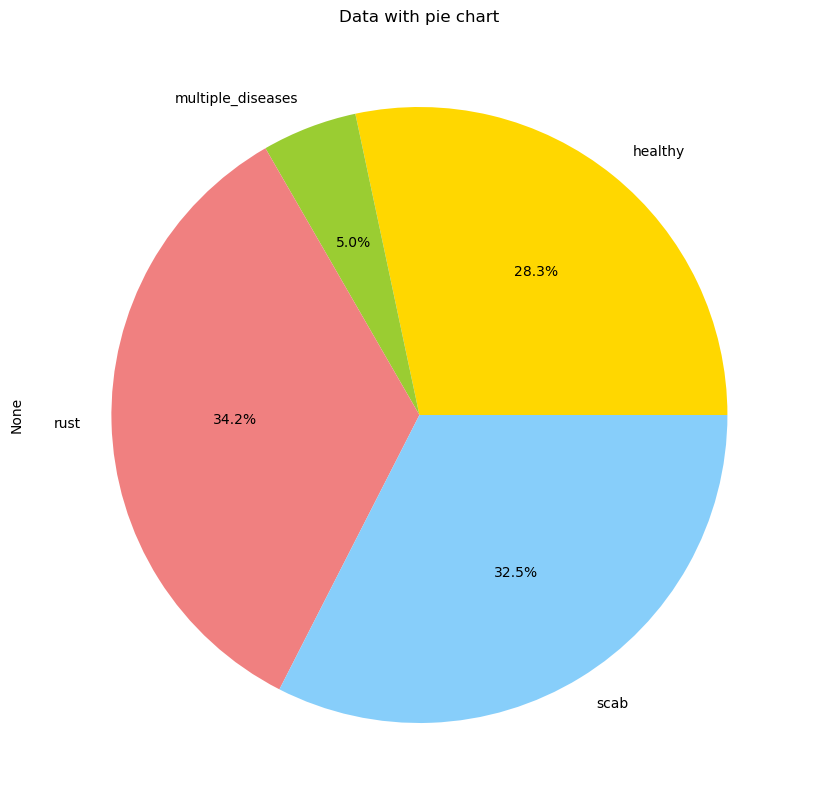

In [9]:
## pie chart
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

data.plot(kind='pie', colors=colors, title='Data with pie chart', figsize=(10,10),autopct='%1.1f%%'
)

In [10]:
class_names=train.loc[:,'healthy':].columns
print(class_names)


Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [11]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1

In [12]:
train.head

<bound method NDFrame.head of         image_id  healthy  multiple_diseases  rust  scab  label
0        Train_0        0                  0     0     1      3
1        Train_1        0                  1     0     0      1
2        Train_2        1                  0     0     0      0
3        Train_3        0                  0     1     0      2
4        Train_4        1                  0     0     0      0
...          ...      ...                ...   ...   ...    ...
1816  Train_1816        0                  0     0     1      3
1817  Train_1817        1                  0     0     0      0
1818  Train_1818        1                  0     0     0      0
1819  Train_1819        0                  0     1     0      2
1820  Train_1820        0                  0     0     1      3

[1821 rows x 6 columns]>

In [13]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [14]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/healthy')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/multiple_disease')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/rust')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/scab')
                
        elif search("Test",img):
            shutil.copy(path,r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/test')

In [15]:
try:
    shutil.os.mkdir(r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train')
    shutil.os.mkdir(r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/healthy')
    shutil.os.mkdir(r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/multiple_disease')
    shutil.os.mkdir(r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/rust')
    shutil.os.mkdir(r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train/scab')

    shutil.os.mkdir(r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/test')
    print("Dir made successfully")
    raise FileExistsError("Error message")

except FileExistsError:
    print ("The data is already prepared")

The data is already prepared


In [16]:
# train_dir=create_train_data()

In [17]:


# Data Preprocessing


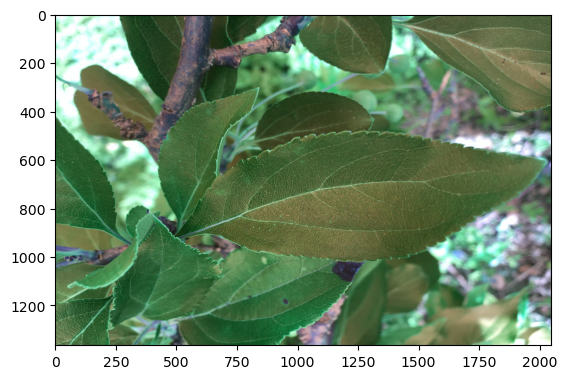

In [18]:
Train_DIR=r'/Users/menna/Documents/College/G3-S1/ML Project/plant-pathology/images/train'
Categories=['healthy','multiple_disease','rust','scab']
IMG_SIZE=100

for category in Categories:
    path=os.path.join(Train_DIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [19]:


# Data Preprocessing


In [20]:
training_data=[]
def create_training_data():
    for category in Categories:
        path=os.path.join(Train_DIR, category)
        class_num=Categories.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()  
print(len(training_data))
lenofimage = len(training_data)

1821


In [21]:
X_train=[]
y_train=[]

for categories, label in training_data:
    X_train.append(categories)
    y_train.append(label)
X_train= np.array(X_train).reshape(lenofimage,-1)
print("Shape of features: " ,X_train.shape)


Shape of features:  (1821, 30000)


In [22]:
# flattening the array
X_train = X_train/255.0

In [23]:
X_train[1]


array([0.21960784, 0.34901961, 0.26666667, ..., 0.28235294, 0.38039216,
       0.30196078])

In [24]:
y_train=np.array(y_train)
y_train.shape


(1821,)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size=0.20,random_state=77,stratify=y_train)


In [26]:
print(X_train.shape)
print(X_test.shape)

(1456, 30000)
(365, 30000)


In [57]:
# fitting our data in SVM model

from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma=0.001, probability=True)
svc.fit(X_train, y_train)

SVC(gamma=0.001, kernel='linear', probability=True)

In [58]:
y_pred = svc.predict(X_test)

In [61]:
y_pred_prob= svc.predict_proba(X_test)

In [59]:
from sklearn.metrics import accuracy_score
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")


The model is 40.0% accurate


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.36      0.42      0.39       103
           1       0.00      0.00      0.00        18
           2       0.41      0.36      0.38       125
           3       0.46      0.49      0.48       119

    accuracy                           0.40       365
   macro avg       0.31      0.32      0.31       365
weighted avg       0.39      0.40      0.40       365



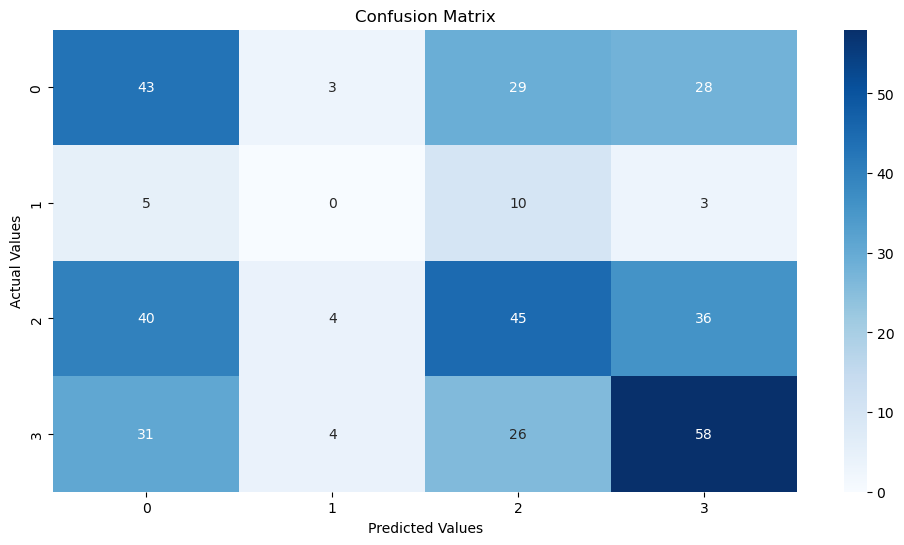

In [34]:
#confusion matrix
import sklearn.metrics as metrics
conf_mat = metrics.confusion_matrix(y_test , y_pred)
# plotting the confusion matrix
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [67]:
from sklearn.metrics import roc_curve, auc
print("\nArea Under Curve (auc): {}".format(round(metrics.roc_auc_score(y_test, y_pred_prob, multi_class="ovo",average='weighted'),4)))
print("\n")
print(metrics.classification_report(y_test , y_pred))


Area Under Curve (auc): 0.6019


              precision    recall  f1-score   support

           0       0.36      0.42      0.39       103
           1       0.00      0.00      0.00        18
           2       0.41      0.36      0.38       125
           3       0.46      0.49      0.48       119

    accuracy                           0.40       365
   macro avg       0.31      0.32      0.31       365
weighted avg       0.39      0.40      0.40       365

